# Census Income Prediction

In [1]:
import pandas as pd
census_train = pd.read_csv('census_train.csv')
census_test = pd.read_csv('census_test.csv')

## Preprocess

Pre-process census_train and census_test to get x_train, y_train, x_test and y_test<br/>

In [2]:
# Show how many values are missing (Labelled with "?")
print("Training data")
print((census_train == "?").sum())
print()
print("Test data")
print((census_test == "?").sum())

Training data
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

Test data
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


Preprocess the data

In [3]:
# Remove the missing value labelled with "?"
census_train = census_train[(census_train.astype(str) != '?').all(axis=1)]
census_test = census_test[(census_test.astype(str) != '?').all(axis=1)]

In [4]:
# Dropping the 'native-country' column
census_train = census_train.drop(['native-country'], axis=1)
census_test = census_test.drop(['native-country'], axis=1)

In [5]:
# Define the category column
category_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']

In [6]:
# y variable changed into binary format and assign it
y_train = census_train.apply(lambda row: 1 if '>50K'in row['income'] else 0, axis=1)
y_test = census_test.apply(lambda row: 1 if '>50K'in row['income'] else 0, axis=1)
# Then remove the income column
census_train = census_train.drop(['income'], axis=1)
census_test = census_test.drop(['income'], axis=1)

In [7]:
# Encode the category into numerical form
# Set the x variable for the Encoding
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for column in category_columns:
    label_encoder = enc.fit(census_train[column])
    print("Categorical classes:", label_encoder.classes_)
    integer_classes = label_encoder.transform(label_encoder.classes_)
    print("Integer classes:", integer_classes)
    train = label_encoder.transform(census_train[column])
    test = label_encoder.transform(census_test[column])
    census_train[column] = train
    census_test[column] = test

Categorical classes: ['Federal-gov' 'Local-gov' 'Private' 'Self-emp-inc' 'Self-emp-not-inc'
 'State-gov' 'Without-pay']
Integer classes: [0 1 2 3 4 5 6]
Categorical classes: ['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college']
Integer classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Categorical classes: ['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed']
Integer classes: [0 1 2 3 4 5 6]
Categorical classes: ['Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving']
Integer classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Categorical classes: ['Husband' 'Not-in-family' 'Other-relative' 'Own-child' 'Unmarried' 'Wife']
I

In [8]:
# Encode the category using one hot encoder
census_train_dummies = pd.get_dummies(census_train, columns=category_columns)
census_test_dummies = pd.get_dummies(census_test, columns=category_columns)

Selection of x_train and x_test depend on how you encode the categorical variable.<br/> 
For my code i am using the label encoding since the dimensionality will be high if i use the dummy. <br/>
Especially when the result does not differ that much

In [9]:
# Select all column as the x using integer encoding
# Use this one
x_train = census_train
x_test = census_test

In [10]:
# Select all column as the x using dummy values / one hot encoding
#x_train = census_train_dummies
#x_test = census_test_dummies

In [11]:
x_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40
1,50,4,83311,9,13,2,3,0,4,1,0,0,13
2,38,2,215646,11,9,0,5,1,4,1,0,0,40
3,53,2,234721,1,7,2,5,0,2,1,0,0,40
4,28,2,338409,9,13,2,9,5,2,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20


## Building Model

Build a decision tree with default parameters and fit the value

In [12]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=2019)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2019)

Get the evaluation metrics

In [13]:
from sklearn import metrics
y_pred = clf.predict(x_test)
print("Test data result:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 score:", metrics.f1_score(y_test, y_pred))
print("ROC score:", metrics.roc_auc_score(y_test, y_pred))

Test data result:
Accuracy: 0.80265604249668
Precision: 0.5945454545454546
Recall: 0.6186486486486487
F1 score: 0.6063576158940398
ROC score: 0.7406183384088314


Check the evaluation matrix of train data too

In [14]:
y_pred_train = clf.predict(x_train)
print("Train data result:")
print("Accuracy:", metrics.accuracy_score(y_train, y_pred_train))
print("Precision:", metrics.precision_score(y_train, y_pred_train))
print("Recall:", metrics.recall_score(y_train, y_pred_train))
print("F1 score:", metrics.f1_score(y_train, y_pred_train))
print("ROC score:", metrics.roc_auc_score(y_train, y_pred_train))

Train data result:
Accuracy: 0.9999668456998873
Precision: 1.0
Recall: 0.9998668087373468
F1 score: 0.9999333999333999
ROC score: 0.9999334043686734


We can see that all the metrics for train data are almost perfect, while test data only have 80% accuracy with other metrics performing worse. <br/>
This clearly display that there are overfitting

Plot the ROC curve of both train and test data.

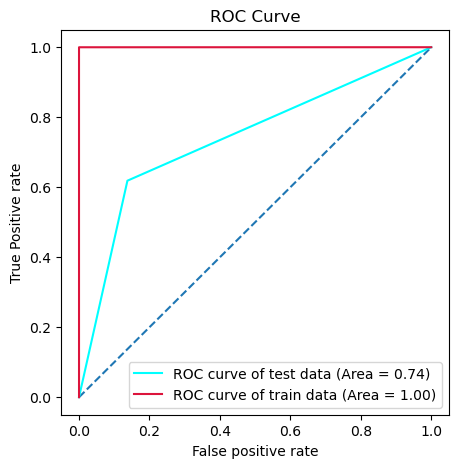

In [15]:
import matplotlib.pyplot as plt
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr[0], tpr[0], _ = metrics.roc_curve(y_test, y_pred)
fpr[1], tpr[1], _ = metrics.roc_curve(y_train, y_pred_train)
for i in range(2):
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
plt.figure(figsize = (5, 5))    
plt.plot([0, 1], [0, 1], linestyle='--')

colors = (['aqua', 'crimson'])
data_set = (['test', 'train'])
for i, data, color in zip(range(2), data_set, colors):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             label='ROC curve of {0} data (Area = {1:0.2f})'
             ''.format(data, roc_auc[i]))    

plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

We can see from the ROC curve too, overfitting clearly happened since the curve of test and training are so far away from one another

## Modified Model

Build a modified decision tree and fit the value

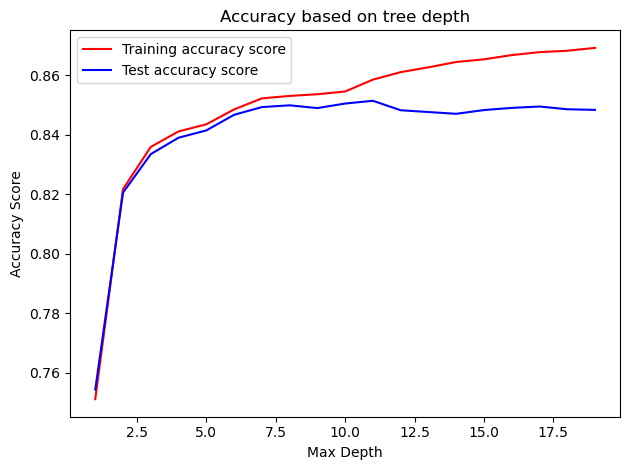

In [16]:
# To get the best max depth
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
max_depth = np.arange(1, 20, 1)
train_results = []
test_results = []

for i in max_depth:
    dt_estimator = tree.DecisionTreeClassifier(max_depth=i, min_samples_split=150, random_state=2019, criterion='entropy')
    dt_estimator.fit(x_train, y_train)
    train_pred = dt_estimator.predict(x_train)
    accuracy_train = accuracy_score(y_train, train_pred)
    train_results.append(accuracy_train)
    test_pred = dt_estimator.predict(x_test)
    accuracy_test = accuracy_score(y_test, test_pred)
    test_results.append(accuracy_test)
    
plt.plot(max_depth, train_results, label="Training accuracy score", color="red")
plt.plot(max_depth, test_results, label="Test accuracy score", color="blue")
plt.title("Accuracy based on tree depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="upper left")
plt.show()

In [17]:
clf_modified = tree.DecisionTreeClassifier(class_weight='None', criterion='entropy', max_depth=10,
                                            max_features=None, max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1, min_samples_split=150,
                                            min_weight_fraction_leaf=0.0,  random_state=2019,
                                            splitter='best')
clf_modified.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=150,
                       random_state=2019)

In [18]:
from sklearn import metrics
y_pred_mod = clf_modified.predict(x_test)
print("Test data result:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_mod))
print("Precision:", metrics.precision_score(y_test, y_pred_mod))
print("Recall:", metrics.recall_score(y_test, y_pred_mod))
print("F1 score:", metrics.f1_score(y_test, y_pred_mod))
print("ROC score:", metrics.roc_auc_score(y_test, y_pred_mod))

Test data result:
Accuracy: 0.850464807436919
Precision: 0.7175480769230769
Recall: 0.6454054054054054
F1 score: 0.6795674445076836
ROC score: 0.781329463266083


In [19]:
y_pred_train = clf_modified.predict(x_train)
print("Train data result:")
print("Accuracy:", metrics.accuracy_score(y_train, y_pred_train))
print("Precision:", metrics.precision_score(y_train, y_pred_train))
print("Recall:", metrics.recall_score(y_train, y_pred_train))
print("F1 score:", metrics.f1_score(y_train, y_pred_train))
print("ROC score:", metrics.roc_auc_score(y_train, y_pred_train))

Train data result:
Accuracy: 0.8545189311053644
Precision: 0.7294117647058823
Recall: 0.660628662759723
F1 score: 0.6933184232597148
ROC score: 0.7897034017427114


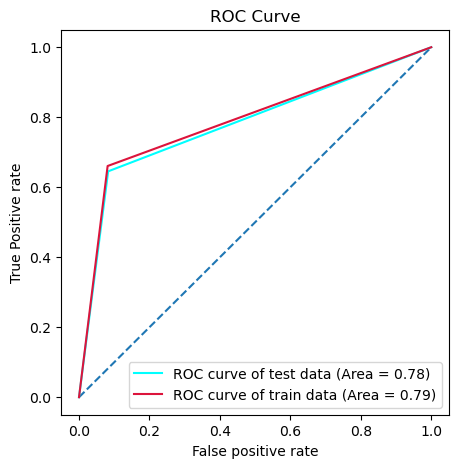

In [20]:
import matplotlib.pyplot as plt
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr[0], tpr[0], _ = metrics.roc_curve(y_test, y_pred_mod)
fpr[1], tpr[1], _ = metrics.roc_curve(y_train, y_pred_train)
for i in range(2):
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
plt.figure(figsize = (5, 5))    
plt.plot([0, 1], [0, 1], linestyle='--')

colors = (['aqua', 'crimson'])
data_set = (['test', 'train'])
for i, data, color in zip(range(2), data_set, colors):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             label='ROC curve of {0} data (Area = {1:0.2f})'
             ''.format(data, roc_auc[i]))    

plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Comparison

We can see the result are much better. Tuning the parameter will improve the decision tree because we prune the tree to avoid overfitting. <br/>
From my experiment, my modified parameter are (Excluding random state): <br/>
1. criterion='entropy'
2. max_depth=10
3. min_samples_split=150

I choose this parameter because i want to find balance, when i set the class weight into 'balanced', the ROC are greatly improved however the accuracy is barely improve. So I want to get decent improvement on both side

In [21]:
print("Comparison:")
print("Default Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Tuned Accuracy:", metrics.accuracy_score(y_test, y_pred_mod))
print()
print("Default ROC score:", metrics.roc_auc_score(y_test, y_pred))
print("Tuned ROC score:", metrics.roc_auc_score(y_test, y_pred_mod))
print()
print("Default Precision:", metrics.precision_score(y_test, y_pred))
print("Tuned Precision:", metrics.precision_score(y_test, y_pred_mod))
print()
print("Default Recall:", metrics.recall_score(y_test, y_pred))
print("Tuned Recall:", metrics.recall_score(y_test, y_pred_mod))
print()
print("Default F1 score:", metrics.f1_score(y_test, y_pred))
print("Tuned F1 score:", metrics.f1_score(y_test, y_pred_mod))

Comparison:
Default Accuracy: 0.80265604249668
Tuned Accuracy: 0.850464807436919

Default ROC score: 0.7406183384088314
Tuned ROC score: 0.781329463266083

Default Precision: 0.5945454545454546
Tuned Precision: 0.7175480769230769

Default Recall: 0.6186486486486487
Tuned Recall: 0.6454054054054054

Default F1 score: 0.6063576158940398
Tuned F1 score: 0.6795674445076836


## Ensemble Learning
In this machine learning task, we should interpret precision as <b>precentage of correctly predicted those with income above 50k out of all those labelled with income above 50k</b>, and we should interpret recall as <b>precentage of correctly predicted those with income above 50k out of all who really have income above 50k.</b>

My choice of the better metric between $F_2$ and $F_{0.5}$ is <b> $F_2$ Because we want to classify correctly as many positive samples as possible, rather than maximizing the number of correct classifications. This is done with the assumption that we are a business, and wanted to market our product to public, but our product is a bit expensive. So, those with income higher than 50k will be more likely to purchase. Subsequently, we want to get as many target we can market our product to. Thus we are focusing more on recall. </b>

In [22]:
x = np.append(x_train, x_test, axis = 0)
y = np.append(y_train, y_test, axis = 0)

### Random Forest
Objective metric on test: $F_2$<br/>
Parameters: criterion, max_depth, min_samples_split, n_estimators

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, fbeta_score

clfRF=RandomForestClassifier(random_state=2019)
parameter_space_rf = { 
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [100, 200],
    'max_depth': [5, 10, 15]
}
f_scorer = make_scorer(fbeta_score, beta = 2)
CV_rfc = GridSearchCV(estimator=clfRF, param_grid=parameter_space_rf, scoring = f_scorer, cv= 5)
CV_rfc.fit(x, y)
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_split': 100,
 'n_estimators': 100}

In [24]:
# Fitting the data with the best parameters
clfRF=RandomForestClassifier(random_state=2019,**CV_rfc.best_params_)
clfRF.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, min_samples_split=100, random_state=2019)

In [25]:
y_pred_rf=clfRF.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision:", metrics.precision_score(y_test, y_pred_rf))
print("Recall:", metrics.recall_score(y_test, y_pred_rf))
print("F2 score:", fbeta_score(y_test, y_pred_rf, beta=2))
print("F0.5 score:", fbeta_score(y_test, y_pred_rf, beta=0.5))
print("ROC score:", metrics.roc_auc_score(y_test, y_pred_rf))

Accuracy: 0.8592297476759628
Precision: 0.7777777777777778
Recall: 0.5978378378378378
F2 score: 0.6268419859442302
F0.5 score: 0.7336163438577872
ROC score: 0.7711020175104683


In [26]:
feature_imp_rf = pd.Series(clfRF.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_imp_rf

relationship      0.206650
capital-gain      0.206531
education-num     0.153948
marital-status    0.122000
age               0.076338
hours-per-week    0.054531
capital-loss      0.051014
education         0.038328
occupation        0.032608
sex               0.020130
fnlwgt            0.019933
workclass         0.014230
race              0.003760
dtype: float64

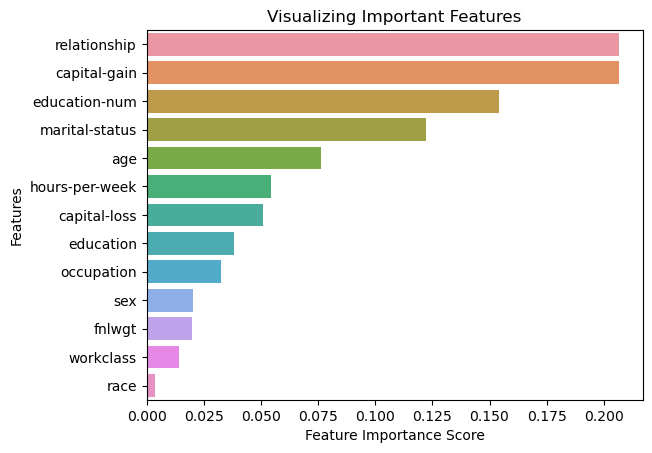

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp_rf, y=feature_imp_rf.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### AdaBoost
Objective metric on test: $F_2$<br/>
Parameters: algorithm, learning_rate, n_estimators

In [28]:
from sklearn.ensemble import AdaBoostClassifier

clfAB=AdaBoostClassifier(random_state=2019)

parameter_space_ab = { 
    'n_estimators': [50, 100],
    'algorithm': ['SAMME', 'SAMME.R'],
    'learning_rate': [0.4, 0.5, 0.6]
}
f_scorer = make_scorer(fbeta_score, beta = 2)
CV_ab = GridSearchCV(estimator=clfAB, param_grid=parameter_space_ab, scoring = f_scorer, cv= 5)
CV_ab.fit(x, y)
CV_ab.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.6, 'n_estimators': 100}

In [29]:
clfAB=AdaBoostClassifier(random_state=2019, **CV_ab.best_params_)
clfAB.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.6, n_estimators=100, random_state=2019)

In [30]:
y_pred_ab=clfAB.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ab))
print("Precision:", metrics.precision_score(y_test, y_pred_ab))
print("Recall:", metrics.recall_score(y_test, y_pred_ab))
print("F2 score:", fbeta_score(y_test, y_pred_ab, beta=2))
print("F0.5 score:", fbeta_score(y_test, y_pred_ab, beta=0.5))
print("ROC score:", metrics.roc_auc_score(y_test, y_pred_ab))

Accuracy: 0.854382470119522
Precision: 0.763553690101434
Recall: 0.59
F2 score: 0.6180984200690866
F0.5 score: 0.7211284355179703
ROC score: 0.7652464788732394


In [31]:
feature_imp_ab = pd.Series(clfAB.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_imp_ab

capital-gain      0.24
occupation        0.16
capital-loss      0.13
age               0.12
relationship      0.08
education-num     0.07
marital-status    0.05
fnlwgt            0.04
sex               0.04
hours-per-week    0.04
workclass         0.02
race              0.01
education         0.00
dtype: float64

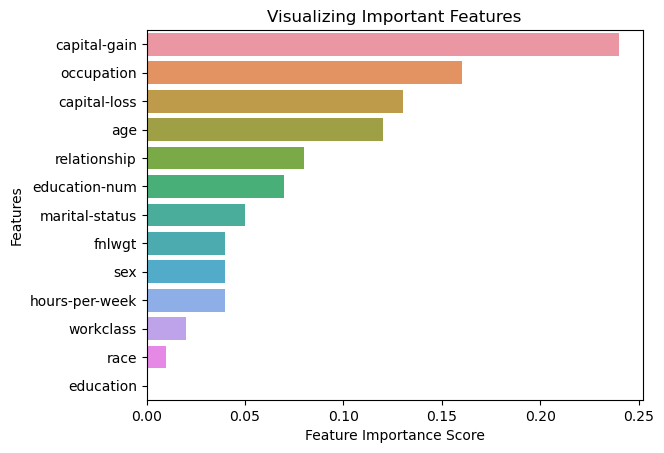

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp_ab, y=feature_imp_ab.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Gradient Boosting
Objective metric on test: $F_2$<br/>
Parameters: criterion, max_depth, min_samples_split, n_estimators

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

clfGB=GradientBoostingClassifier()
parameter_space_gb = { 
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [100, 200],
    'criterion': ['squared_error', 'friedman_mse']
}
f_scorer = make_scorer(fbeta_score, beta = 2)
CV_gb = GridSearchCV(estimator=clfGB, param_grid=parameter_space_gb, scoring = f_scorer, cv= 5)
CV_gb.fit(x, y)
CV_gb.best_params_



{'criterion': 'squared_error',
 'max_depth': 10,
 'min_samples_split': 200,
 'n_estimators': 200}

In [34]:
clfGB=GradientBoostingClassifier(random_state=2019, **CV_gb.best_params_)
clfGB.fit(x_train,y_train)

GradientBoostingClassifier(criterion='squared_error', max_depth=10,
                           min_samples_split=200, n_estimators=200,
                           random_state=2019)

In [35]:
y_pred_gb=clfGB.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gb))
print("Precision:", metrics.precision_score(y_test, y_pred_gb))
print("Recall:", metrics.recall_score(y_test, y_pred_gb))
print("F2 score:", fbeta_score(y_test, y_pred_gb, beta=2))
print("F0.5 score:", fbeta_score(y_test, y_pred_gb, beta=0.5))
print("ROC score:", metrics.roc_auc_score(y_test, y_pred_gb))

Accuracy: 0.8658698539176627
Precision: 0.7607076350093109
Recall: 0.6624324324324324
F2 score: 0.6800022195094884
F0.5 score: 0.7387870749939714
ROC score: 0.7972813570612868


In [36]:
feature_imp_gb = pd.Series(clfGB.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_imp_gb

relationship      0.315205
capital-gain      0.187394
education-num     0.175465
fnlwgt            0.072647
age               0.062788
capital-loss      0.061445
hours-per-week    0.048065
occupation        0.037369
workclass         0.019723
marital-status    0.006355
education         0.005686
race              0.004225
sex               0.003633
dtype: float64

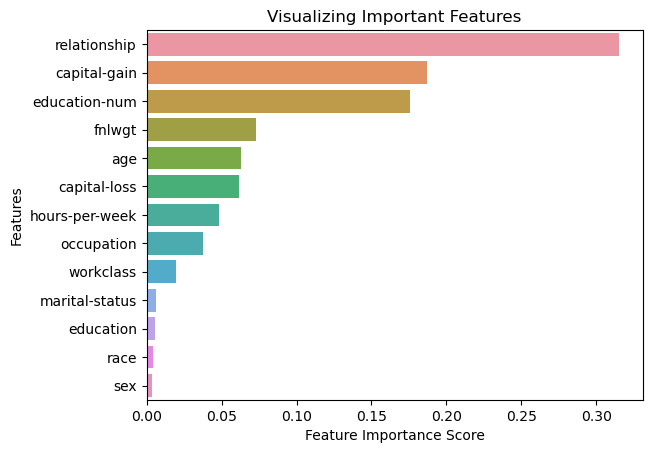

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp_gb, y=feature_imp_gb.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## Important Features

| Classifier | RandomForest | AdaBoost | GradientBoosting |
| --- | --- | --- | --- |
| Feature 1 |relationship|capital-gain|relationship|
| Feature 2 |capital-gain|occupation|capital-gain|
| Feature 3 |education-num|capital-loss|education-num|
| Feature 4 |marital-status|age|fnlwgt|
| Feature 5 |age|relationship|age|